In [29]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('classic_cartpole')

In [30]:

list(episodes['number_of_weights'].unique())


[1104, 68, 52, 2208, 232, 296, 84, 168, 4256, 848, 3232, 592]

In [31]:
kek = [1104, 68, 52, 2208, 232, 296, 84, 168, 4256, 848, 3232, 592]
kek.sort()
kek


[52, 68, 84, 168, 232, 296, 592, 848, 1104, 2208, 3232, 4256]

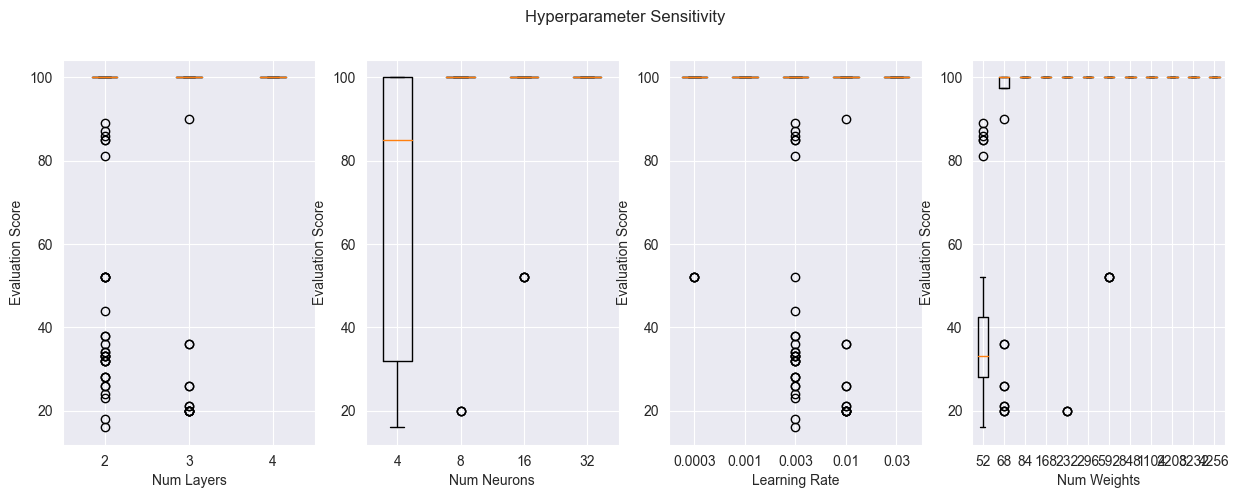

In [32]:
# Group episodes by trial, episode, and hyperparameters, get average evaluation score for each episode in the trial
# grouped_episodes = episodes.groupby(['trial_id', 'episode', 'layers', 'neurons', 'number_of_weights', 'learning_rate']).agg(
#     {'evaluation_score': 'mean'}).reset_index()

# Get the maximum evaluation score for each episode
best_eval_score = episodes.groupby('episode')['evaluation_score'].max().reset_index()

# Filter the episodes to only include the best evaluation score for each episode
best_episodes = pd.merge(best_eval_score, episodes, on=['episode', 'evaluation_score'], how='inner')

# Create box plots for each hyperparameter configuration
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Hyperparameter Sensitivity')

axs[0].boxplot([best_episodes[best_episodes['layers'] == l]['evaluation_score'] for l in [2, 3, 4]])
axs[0].set_xticklabels([2, 3, 4])
axs[0].set_xlabel('Num Layers')
axs[0].set_ylabel('Evaluation Score')

axs[1].boxplot([best_episodes[best_episodes['neurons'] == n]['evaluation_score'] for n in [4, 8, 16, 32]])
axs[1].set_xticklabels([4, 8, 16, 32])
axs[1].set_xlabel('Num Neurons')
axs[1].set_ylabel('Evaluation Score')

axs[2].boxplot([best_episodes[best_episodes['learning_rate'] == lr]['evaluation_score'] for lr in
                [0.0003, 0.001, 0.003, 0.01, 0.03]])
axs[2].set_xticklabels([0.0003, 0.001, 0.003, 0.01, 0.03])
axs[2].set_xlabel('Learning Rate')
axs[2].set_ylabel('Evaluation Score')

axs[3].boxplot([best_episodes[best_episodes['number_of_weights'] == w]['evaluation_score'] for w in
                [52, 68, 84, 168, 232, 296, 592, 848, 1104, 2208, 3232, 4256]])
axs[3].set_xticklabels([52, 68, 84, 168, 232, 296, 592, 848, 1104, 2208, 3232, 4256])
axs[3].set_xlabel('Num Weights')
axs[3].set_ylabel('Evaluation Score')


plt.show()


Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Nodes')

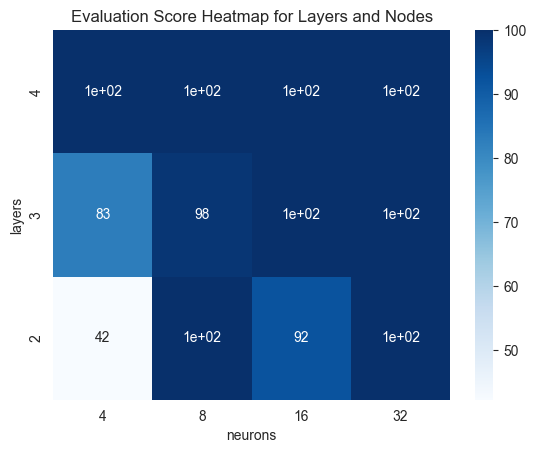

In [33]:
# Create a pivot table to aggregate the evaluation score by layers and neurons
layers_nodes = best_episodes.pivot_table(index='layers', columns='neurons', values='evaluation_score', aggfunc='mean')

# Create a heatmap for layers and neurons
sns.heatmap(layers_nodes, annot=True, cmap='Blues').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Nodes')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Learning Rate')

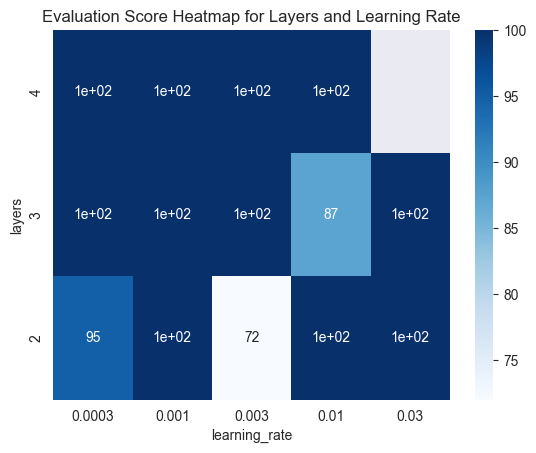

In [34]:
# Create a pivot table to aggregate the evaluation score by layers and learning rate
layers_lr = best_episodes.pivot_table(index='layers', columns='learning_rate', values='evaluation_score',
                                      aggfunc='mean')

# Create a heatmap for layers and learning rate
sns.heatmap(layers_lr, annot=True, cmap='Blues').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Learning Rate')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Learning Rate and Nodes')

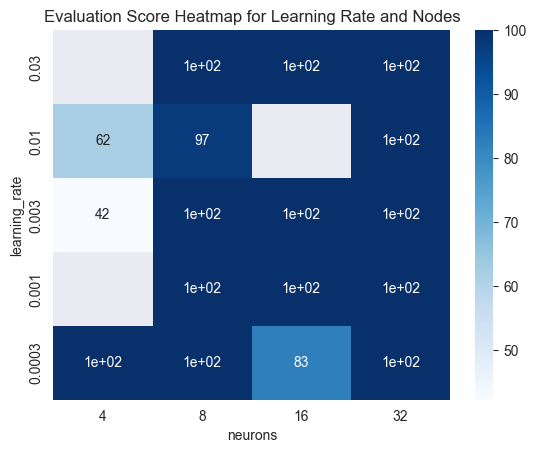

In [35]:
# Create a pivot table to aggregate the evaluation score by learning rate and nodes
lr_nodes = best_episodes.pivot_table(index='learning_rate', columns='neurons', values='evaluation_score',
                                     aggfunc='mean')

# Create a heatmap for learning rate and nodes
sns.heatmap(lr_nodes, annot=True, cmap='Blues').invert_yaxis()
plt.title('Evaluation Score Heatmap for Learning Rate and Nodes')
